In [2]:
'''
範例
''' 
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn # 要安裝的是 scikit-learn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline

0.24.1


In [3]:
#用字典產生一組資料
data={'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
     'age':[23,40,5,30,1,40,16,27,43,8],
     'height':[180,170,100,176,70,160,170,166,155,np.NAN],
     'weight':[100,68,20,np.NAN,10,np.NAN,50,58,58,17]}
#轉成 dataframe格式 
data=pd.DataFrame(data) #生成DataFrame
display(data)

,sex,age,height,weight
0,Male,23,180.0,100.0
1,Male,40,170.0,68.0
2,Male,5,100.0,20.0
3,Male,30,176.0,NaN
4,Male,1,70.0,10.0
5,Female,40,160.0,NaN
6,Female,16,170.0,50.0
7,Female,27,166.0,58.0
8,Female,43,155.0,58.0
9,Female,8,NaN,17.0


In [10]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False) #ascending上升排序
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate']) ##生成DataFrame
print(missing_vals)
print('')
print('身高和體重上，有遺失值')
print('性別和年紀，沒有遺失值')

        missing_rate
sex              0.0
age              0.0
height           0.1
weight           0.2

身高和體重上，有遺失值
性別和年紀，沒有遺失值


男生女生的身高特性有差異


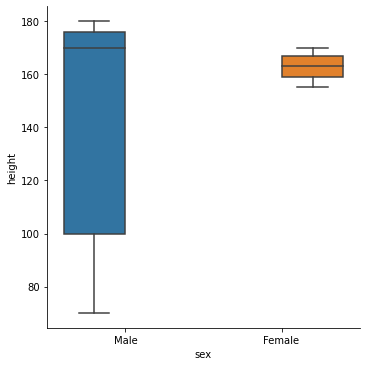

In [11]:
#觀察資料
#身高和性別的關係
g = sns.catplot(x="sex", y="height", hue="sex",
               data=data,kind="box")
print("男生女生的身高特性有差異")

年齡和身高有關連


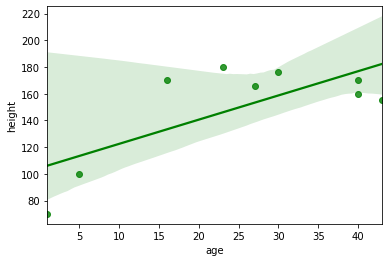

In [12]:
g = sns.regplot(x="age", y="height", color="g",data=data)
print('年齡和身高有關連')

體重和年紀也有關聯


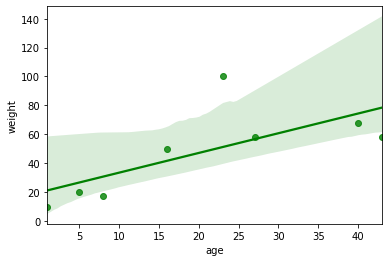

In [13]:
g = sns.regplot(x="age", y="weight", color="g",data=data)
print('體重和年紀也有關聯')

/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


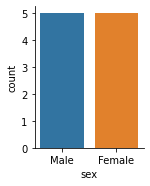

In [14]:
#探索已知
#男生女生個數
g = sns.catplot("sex",
                data=data,
                kind="count", height=2.5, aspect=.8)

發現男生女生都有小孩族群


/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


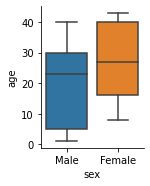

In [15]:
#男生女生中年齡分布
g = sns.catplot("sex",'age',
                data=data,
                kind="box", height=2.5, aspect=.8)
print('發現男生女生都有小孩族群')

In [16]:
# 細看遺失資料的樣態
missing_index=data.isnull()
display(data[missing_index.values==True])

,sex,age,height,weight
3,Male,30,176.0,NaN
5,Female,40,160.0,NaN
9,Female,8,NaN,17.0


In [17]:
#透過 KNN 來補值
#K=1,weights= uniform
ori_data={'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
     'age':[23,40,5,30,1,40,16,27,43,8],
     'height':[180,170,100,176,70,160,170,166,155,np.NAN],
     'weight':[100,68,20,np.NAN,10,np.NAN,50,58,58,17]}
 
ori_data=pd.DataFrame(ori_data)
display(ori_data)

,sex,age,height,weight
0,Male,23,180.0,100.0
1,Male,40,170.0,68.0
2,Male,5,100.0,20.0
3,Male,30,176.0,NaN
4,Male,1,70.0,10.0
5,Female,40,160.0,NaN
6,Female,16,170.0,50.0
7,Female,27,166.0,58.0
8,Female,43,155.0,58.0
9,Female,8,NaN,17.0


In [18]:
#Step1: 離散轉連續型資料
data=ori_data.copy() #複製一份資料給 data
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
display(data)

,sex,age,height,weight
0,1,23,180.0,100.0
1,1,40,170.0,68.0
2,1,5,100.0,20.0
3,1,30,176.0,NaN
4,1,1,70.0,10.0
5,0,40,160.0,NaN
6,0,16,170.0,50.0
7,0,27,166.0,58.0
8,0,43,155.0,58.0
9,0,8,NaN,17.0


In [20]:
#Step 2 :計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data)))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html?highlight=nan_euclidean

print('所以從這各表中，我們可以發現 第九個位置的點，和 2 最接近。')

,0,1,2,3,4,5,6,7,8,9
0,0.000000,37.589892,114.560028,9.309493,143.819331,30.331502,51.478151,44.463468,52.820451,97.399521
1,37.589892,0.000000,91.809586,13.466007,122.004098,11.604597,30.016662,16.911535,18.303005,69.531767
2,114.560028,91.809586,0.000000,92.383260,31.874755,80.216374,76.954532,79.277992,76.902536,5.033223
3,9.309493,13.466007,92.383260,0.000000,126.896283,21.817424,17.625739,12.110601,28.542366,31.144823
4,143.819331,122.004098,31.874755,126.896283,0.000000,113.266647,108.747414,110.440029,106.273233,11.489125
5,30.331502,11.604597,80.216374,21.817424,113.266647,0.000000,30.022214,16.532796,6.733003,45.254834
6,51.478151,30.016662,76.954532,17.625739,108.747414,30.022214,0.000000,14.177447,31.906112,39.208843
7,44.463468,16.911535,79.277992,12.110601,110.440029,16.532796,14.177447,0.000000,19.416488,52.179178
8,52.820451,18.303005,76.902536,28.542366,106.273233,6.733003,31.906112,19.416488,0.000000,62.246821
9,97.399521,69.531767,5.033223,31.144823,11.489125,45.254834,39.208843,52.179178,62.246821,0.000000


所以從這各表中，我們可以發現 第九個位置的點，和 2 最接近。


In [29]:
#Step3: 透過 KNN 進行補值
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
df_filledName = df_filled.rename(columns={0:'sex',1:'age',2:'height',3:'weight'})
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filledName)

,sex,age,height,weight
0,1.0,23.0,180.0,100.0
1,1.0,40.0,170.0,68.0
2,1.0,5.0,100.0,20.0
3,1.0,30.0,176.0,100.0
4,1.0,1.0,70.0,10.0
5,0.0,40.0,160.0,58.0
6,0.0,16.0,170.0,50.0
7,0.0,27.0,166.0,58.0
8,0.0,43.0,155.0,58.0
9,0.0,8.0,100.0,17.0


In [33]:
print('判斷補值的好壞?')
print()
print('可以運用模型預測準確度的指標，來判斷補值的好壞')
print()
print('MSE代表均方誤差(Mean-Square Error)。即絕對誤差的平均值，來判斷， MSE 越小代表補值的準確度越高。 還有其他的指標可以使用，在建立模型的課程中，會提到更多的指標。')

判斷補值的好壞?

可以運用模型預測準確度的指標，來判斷補值的好壞

MSE代表均方誤差(Mean-Square Error)。即絕對誤差的平均值，來判斷， MSE 越小代表補值的準確度越高。 還有其他的指標可以使用，在建立模型的課程中，會提到更多的指標。


In [34]:
data=ori_data.copy() #複製一份資料給 data
from sklearn import preprocessing
#轉型 
le = preprocessing.LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
print(data['sex'])
# KNN
value_neighbors=1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: sex, dtype: int64


In [40]:
#* Step2:隨機取 2 個資料點，當作遺失值
a = random.sample(list(completet_data.index),2) 
missing_data=completet_data.copy()
missing_data['height'].iloc[a]=np.nan
missing_data['weight'].iloc[a]=np.nan
display(missing_data)

/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,sex,age,height,weight
0,1,23,180.0,100.0
1,1,40,170.0,68.0
2,1,5,100.0,20.0
3,1,1,NaN,NaN
4,0,16,NaN,NaN
5,0,27,166.0,58.0
6,0,43,155.0,58.0


In [42]:
display(completet_data)
display(verify_impute)

,sex,age,height,weight
0,1,23,180.0,100.0
1,1,40,170.0,68.0
2,1,5,100.0,20.0
3,1,1,70.0,10.0
4,0,16,170.0,50.0
5,0,27,166.0,58.0
6,0,43,155.0,58.0


,sex,age,height,weight,imputed_h,imputed_w
0,1.0,23.0,180.0,100.0,0.0,0.0
1,1.0,40.0,170.0,68.0,0.0,0.0
2,1.0,5.0,100.0,20.0,0.0,0.0
3,1.0,1.0,100.0,20.0,1.0,1.0
4,0.0,16.0,180.0,100.0,1.0,1.0
5,0.0,27.0,166.0,58.0,0.0,0.0
6,0.0,43.0,155.0,58.0,0.0,0.0


In [46]:
# 判斷 df_filled 和 data 的距離
# height
# weight
# Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。


from sklearn.metrics import mean_squared_error

y_true1 =completet_data['height']
y_pred1 = verify_impute['height']
MSE_h=mean_squared_error(y_true1, y_pred1)
print(MSE_h)
print()
print('這邊的 MSE1 很大的原因，是因為和遺失值旁邊的資料點數不多，對於 KNN 而言資料量要夠多，補值的效果才會比較好。')
print()
print('每次 random 的效果不同')

142.85714285714286

這邊的 MSE1 很大的原因，是因為和遺失值旁邊的資料點數不多，對於 KNN 而言資料量要夠多，補值的效果才會比較好。

每次 random 的效果不同
